future enhancement: random solvable maze generating function banaayera tya bata call garne instead of giving a maze as input

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

In [14]:
original_maze = [
    ['S', 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0],
    [1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0],
    [0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0],
    [0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
    [1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0],
    [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
    [0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0],
    [0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0],
    [0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0],
    [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0],
    [1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0],
    [0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0],
    [0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0],
    [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0],
    [1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1],
    [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0],
    [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 'G'],
]

In [15]:
def to_numeric_grid(maze):
    mapping = {'S':2, 'G':3, '1':1, '0':0, 1:1, 0:0}
    numeric_grid = np.array([[mapping.get(element,4) for element in row] for row in maze],dtype=int)
    return numeric_grid

numerized_maze=to_numeric_grid(original_maze)

In [16]:
def find_pos(maze,value):
    for i in range(len(maze)): #iterating over rows in the maze
        for j in range(len(maze[i])): #iterating over elements in a row
            if maze[i][j]==value:
                return np.array((i,j))
    return None

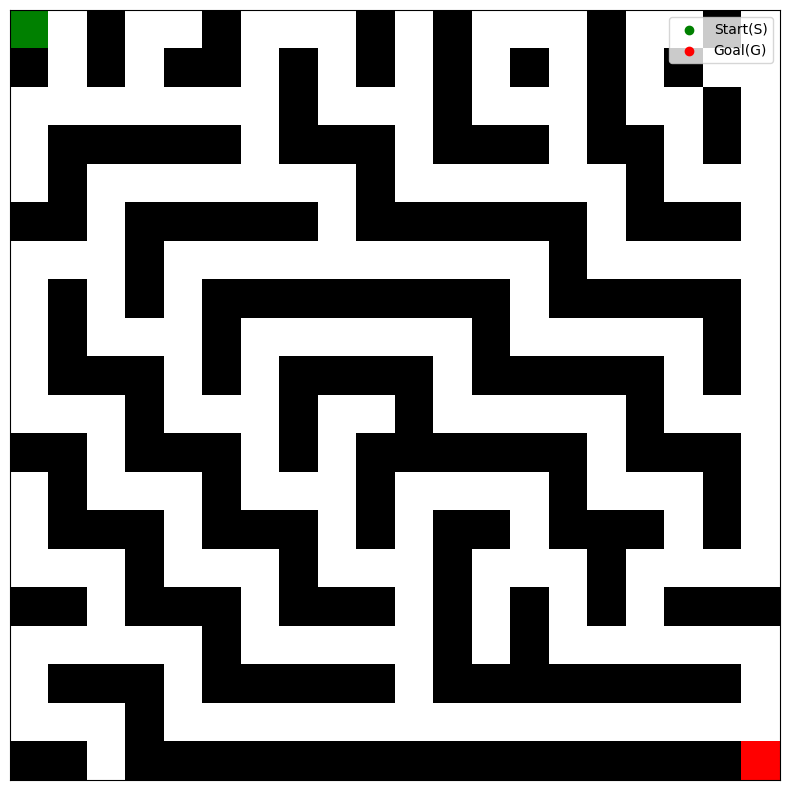

In [33]:
def visualize_maze(maze):
    start_pos=find_pos(maze,2)
    goal_pos=find_pos(maze,3)

    cmap = colors.ListedColormap(['white', 'black','green','red'])
    bounds = [-0.5, 0.5, 1.5,2.5,3.5]
    norm = colors.BoundaryNorm(bounds, cmap.N)

    plt.figure(figsize=(10,10))
    plt.imshow(maze, cmap=cmap,norm=norm)

    plt.scatter([],[],c='green',label='Start(S)')
    plt.scatter([],[],c='red',label='Goal(G)')
    plt.legend()

    plt.xticks([])
    plt.yticks([])

    plt.show()

visualize_maze(numerized_maze)

In [43]:
def get_neighbors(maze, r,c):
    directions =[(-1,0),(1,0),(0,1),(0,-1)]
    rows, columns = len(maze), len(maze[0])

    for (dr, dc) in directions:
        nr = r+dr
        nc = c+dc
        if (0 <= nr < rows) and (0 <= nc < columns):
            if maze[nr][nc] != 1:
                yield (nr,nc)
        
neighbors = list(get_neighbors(numerized_maze, 1, 1))
print(neighbors)

[(0, 1), (2, 1)]
